# Przegląd metod redukcji wymiarów w danych wielowymiarowych wraz z prezentacją i wizualizacją ich działania

Cel projektu: celem projektu jest dokonanie przeglądu i implementacji wybranych metod redukcji wymiarów dla
danych wielowymiarowych (np. PCA, t-SNE, UMAP). Aplikacja powinna umożliwiać wczytywanie
danych, przeprowadzanie redukcji wymiarów oraz wizualizację wyników (np. w 2D lub 3D), a także
porównanie efektywności poszczególnych metod.

In [50]:
# Wszystkie wymagane importy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, fetch_openml, make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [51]:
plt.style.use('dark_background')

In [52]:
scaler = StandardScaler()

## Wizualizacje

### Inicjalizacja Swiss Roll i Blobs 3D

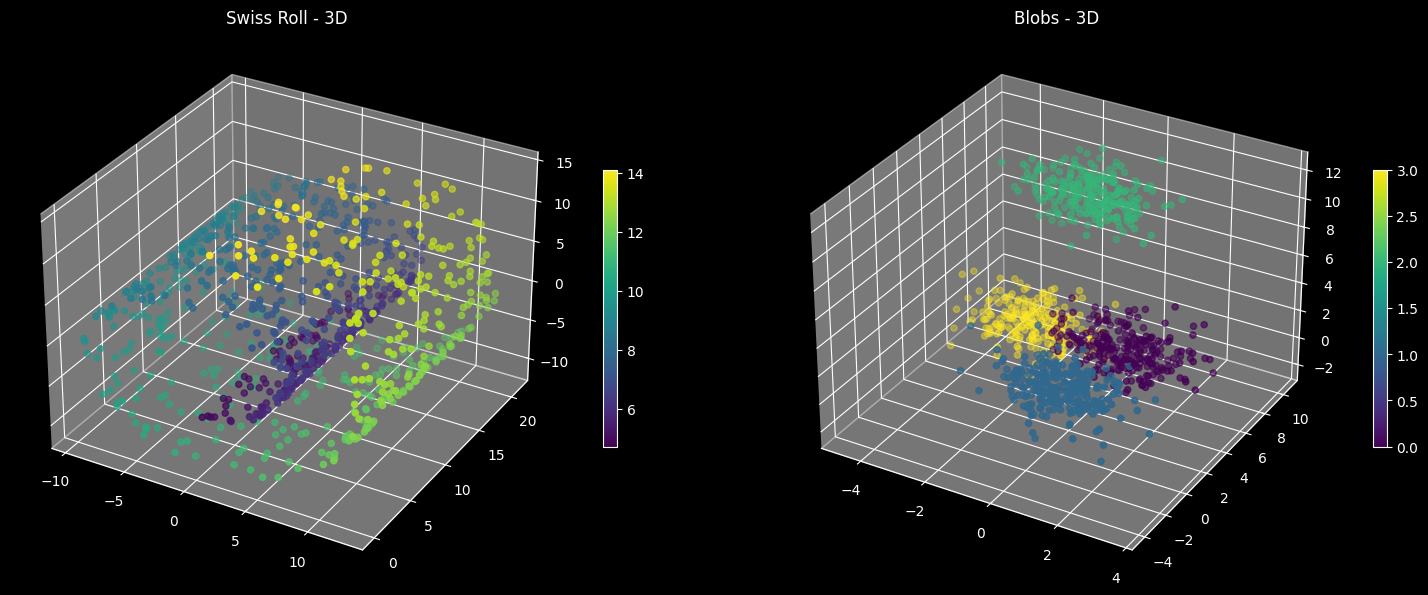

In [53]:
fig = plt.figure(figsize=(16, 6))

# Swiss Roll 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
X_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise=0.05)
p1 = ax1.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2], c=y_swiss, cmap=plt.cm.viridis)
ax1.set_title("Swiss Roll - 3D")
fig.colorbar(p1, ax=ax1, shrink=0.5)

# Blobs 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=4, n_features=3, random_state=0)
p2 = ax2.scatter(X_blobs[:,0], X_blobs[:,1], X_blobs[:,2], c=y_blobs, cmap=plt.cm.viridis)
ax2.set_title("Blobs - 3D")
fig.colorbar(p2, ax=ax2, shrink=0.5)

plt.tight_layout()
plt.show()

### PCA

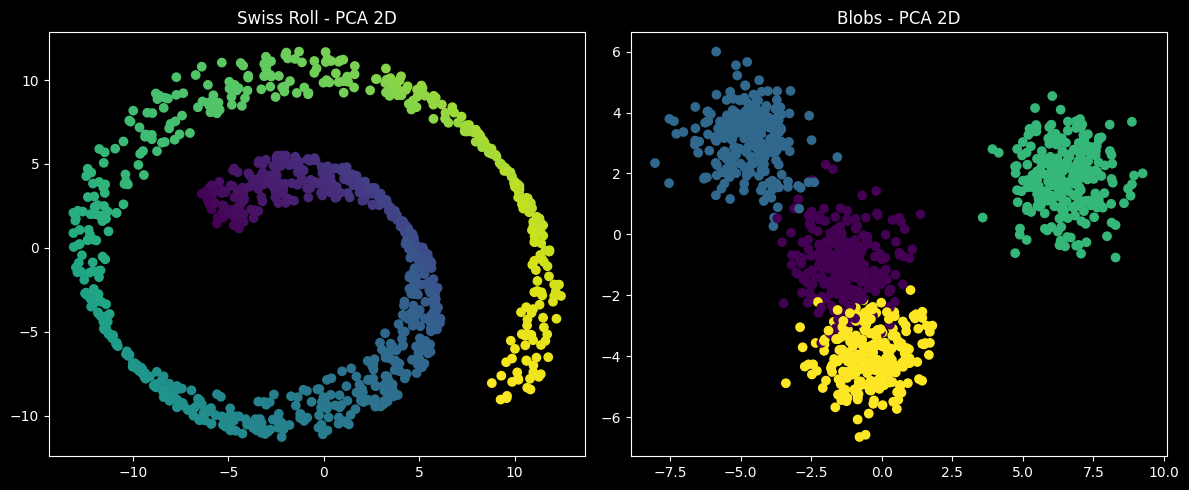

PCA on swiss roll computation time: 0.0032 
PCA on blobs computation time: 0.0001 


In [54]:
pca_swiss = PCA(n_components=2)
start_swiss = time.perf_counter()
X_pca_swiss = pca_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

start_blobs = time.perf_counter()
pca_blobs = PCA(n_components=2)
end_blobs = time.perf_counter()
X_pca_blobs = pca_blobs.fit_transform(X_blobs)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - PCA 2D")

axs[1].scatter(X_pca_blobs[:,0], X_pca_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - PCA 2D")

plt.tight_layout()
plt.show()

print(f"PCA on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"PCA on blobs computation time: {end_blobs - start_blobs:.4f} ")

### TSNE

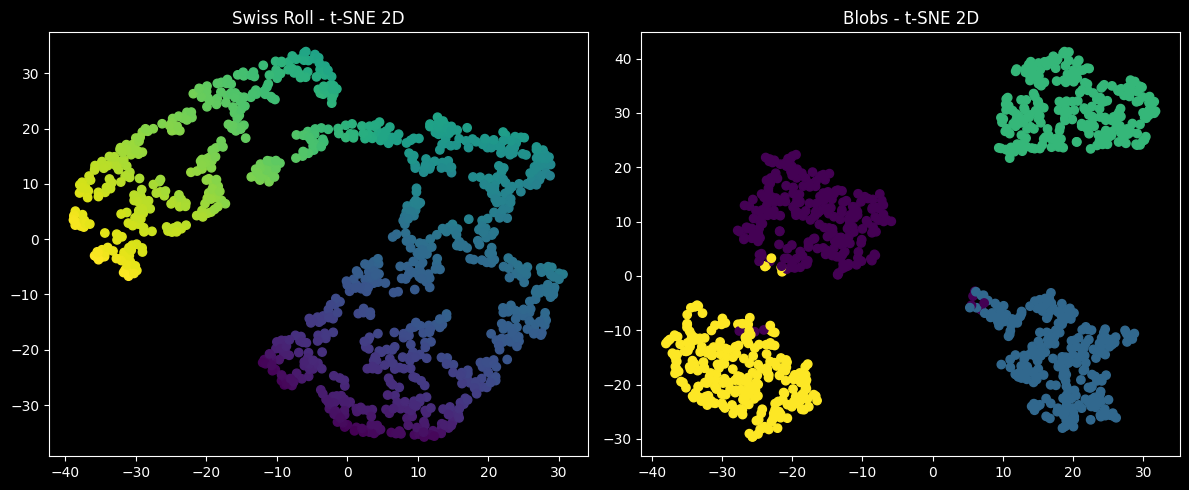

t-SNE on swiss roll computation time: 4.2003 
t-SNE on blobs computation time: 4.4188 


In [55]:
tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_swiss = time.perf_counter()
X_tsne_swiss = tsne_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

tsne_blobs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_blobs = time.perf_counter()
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs)
end_blobs = time.perf_counter()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_tsne_swiss[:,0], X_tsne_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - t-SNE 2D")
axs[1].scatter(X_tsne_blobs[:,0], X_tsne_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - t-SNE 2D")
plt.tight_layout()
plt.show()

print(f"t-SNE on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"t-SNE on blobs computation time: {end_blobs - start_blobs:.4f} ")

### UMAP

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


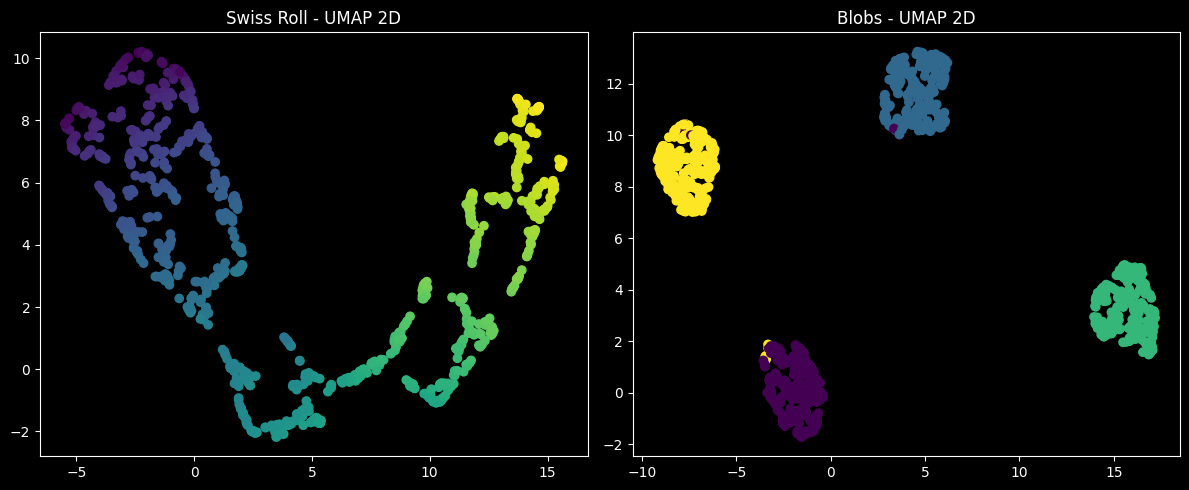

UMAP on swiss roll computation time: 3.2253 
UMAP on blobs computation time: 3.4181 


In [56]:
umap_swiss = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_swiss = time.perf_counter()
X_umap_swiss = umap_swiss.fit_transform(X_swiss)
end_swiss = time.perf_counter()

umap_blobs = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_blobs = time.perf_counter()
X_umap_blobs = umap_blobs.fit_transform(X_blobs)
end_blobs = time.perf_counter()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_umap_swiss[:,0], X_umap_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - UMAP 2D")
axs[1].scatter(X_umap_blobs[:,0], X_umap_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title("Blobs - UMAP 2D")
plt.tight_layout()
plt.show()

print(f"UMAP on swiss roll computation time: {end_swiss - start_swiss:.4f} ")
print(f"UMAP on blobs computation time: {end_blobs - start_blobs:.4f} ")

### Porównania dla Swiss Roll

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


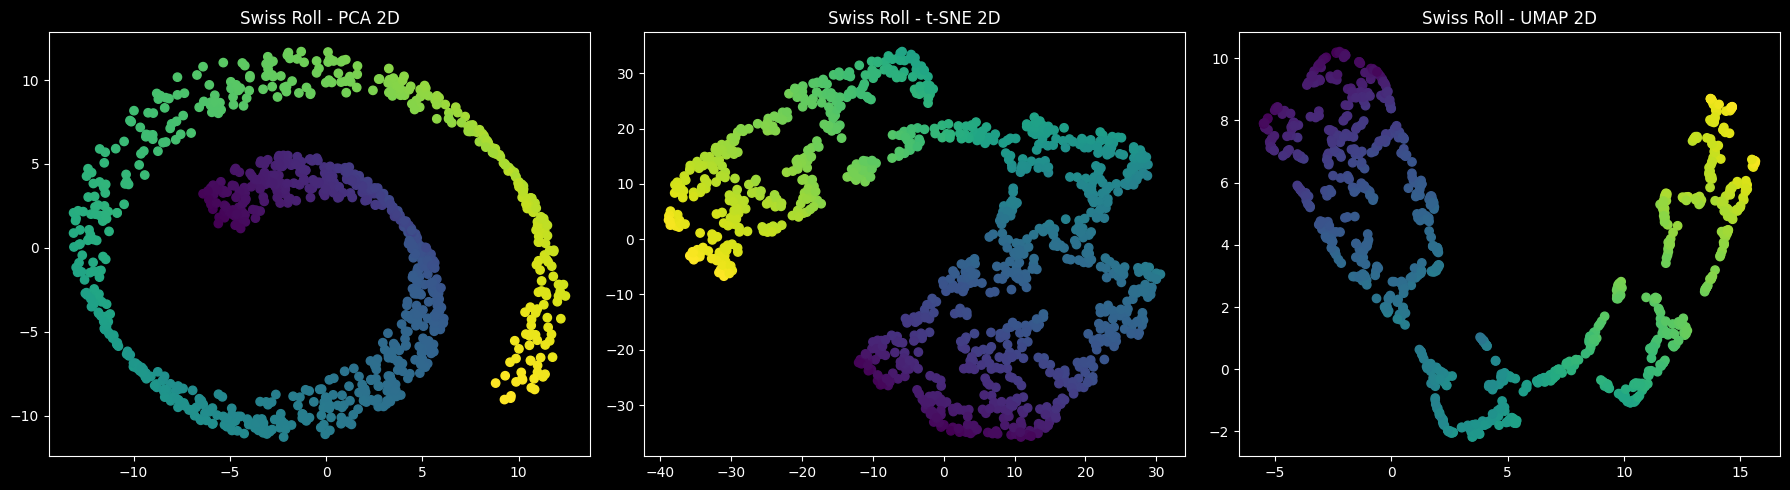

In [57]:
pca_swiss = PCA(n_components=2)
X_pca_swiss = pca_swiss.fit_transform(X_swiss)

tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_tsne_swiss = tsne_swiss.fit_transform(X_swiss)

umap_swiss = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_swiss = umap_swiss.fit_transform(X_swiss)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[0].set_title("Swiss Roll - PCA 2D")

axs[1].scatter(X_tsne_swiss[:,0], X_tsne_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[1].set_title("Swiss Roll - t-SNE 2D")

axs[2].scatter(X_umap_swiss[:,0], X_umap_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
axs[2].set_title("Swiss Roll - UMAP 2D")

plt.tight_layout()
plt.show()

- PCA nie jest w stanie rozwinąć struktury Swiss Roll – dane są na siebie nałożone, co utrudnia interpretację.
- t-SNE bardzo dobrze rozdziela poszczególne fragmenty Swiss Roll, zachowując lokalną strukturę danych.
- UMAP również dobrze odwzorowuje strukturę Swiss Roll, zachowując zarówno lokalne, jak i częściowo globalne relacje.
- Metody nieliniowe (t-SNE, UMAP) są znacznie skuteczniejsze od PCA dla danych o złożonej, nieliniowej strukturze.

### Porównania dla Blobls

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


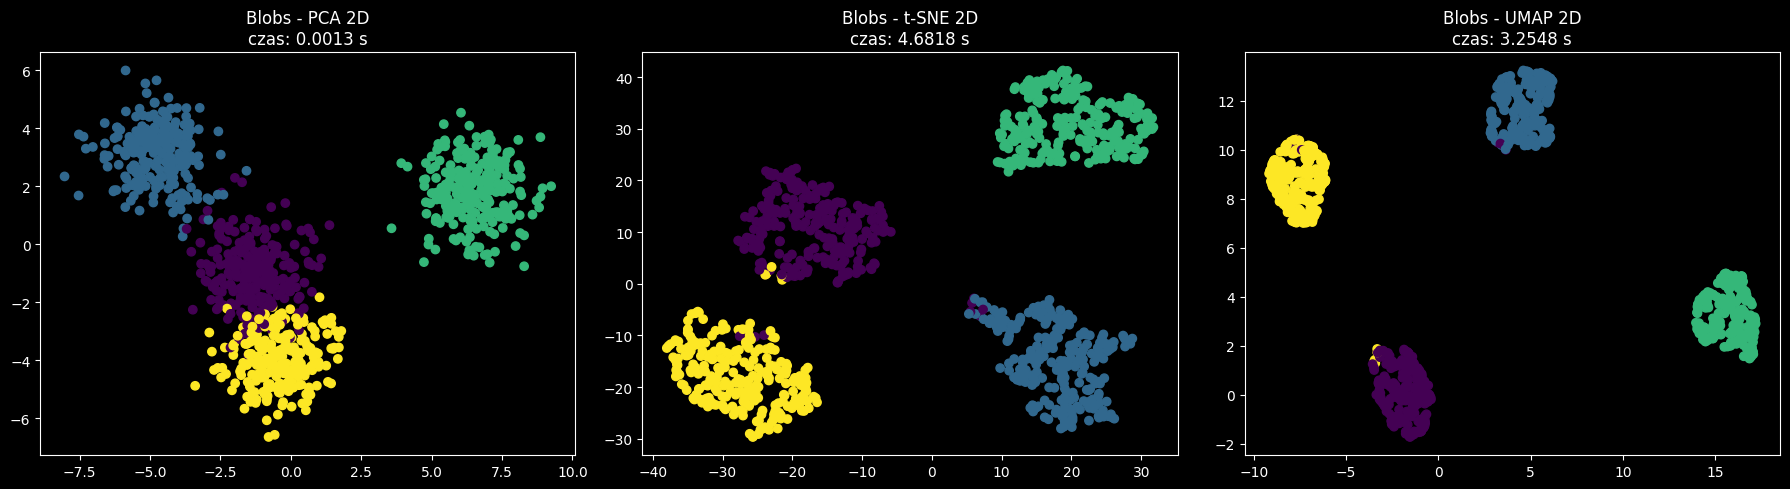

In [58]:
# PCA
start_pca = time.perf_counter()
pca_blobs = PCA(n_components=2)
X_pca_blobs = pca_blobs.fit_transform(X_blobs)
end_pca = time.perf_counter()

# t-SNE
start_tsne = time.perf_counter()
tsne_blobs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs)
end_tsne = time.perf_counter()

# UMAP
start_umap = time.perf_counter()
umap_blobs = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_blobs = umap_blobs.fit_transform(X_blobs)
end_umap = time.perf_counter()



fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_blobs[:,0], X_pca_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[0].set_title(f"Blobs - PCA 2D\nczas: {end_pca - start_pca:.4f} s")

axs[1].scatter(X_tsne_blobs[:,0], X_tsne_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[1].set_title(f"Blobs - t-SNE 2D\nczas: {end_tsne - start_tsne:.4f} s")

axs[2].scatter(X_umap_blobs[:,0], X_umap_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
axs[2].set_title(f"Blobs - UMAP 2D\nczas: {end_umap - start_umap:.4f} s")

plt.tight_layout()
plt.show()

- Wszystkie trzy metody (PCA, t-SNE, UMAP) dobrze rozdzielają skupiska (bloby) w 2D.
- PCA jest najszybsze i wystarczające dla danych o prostych, liniowych zależnościach.
- t-SNE i UMAP również poprawnie odwzorowują rozkład skupisk, ale są wolniejsze od PCA.
- Dla tego typu danych nie widać dużej przewagi metod nieliniowych nad PCA.

## Mnist

/home/wojciech/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wojciech/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


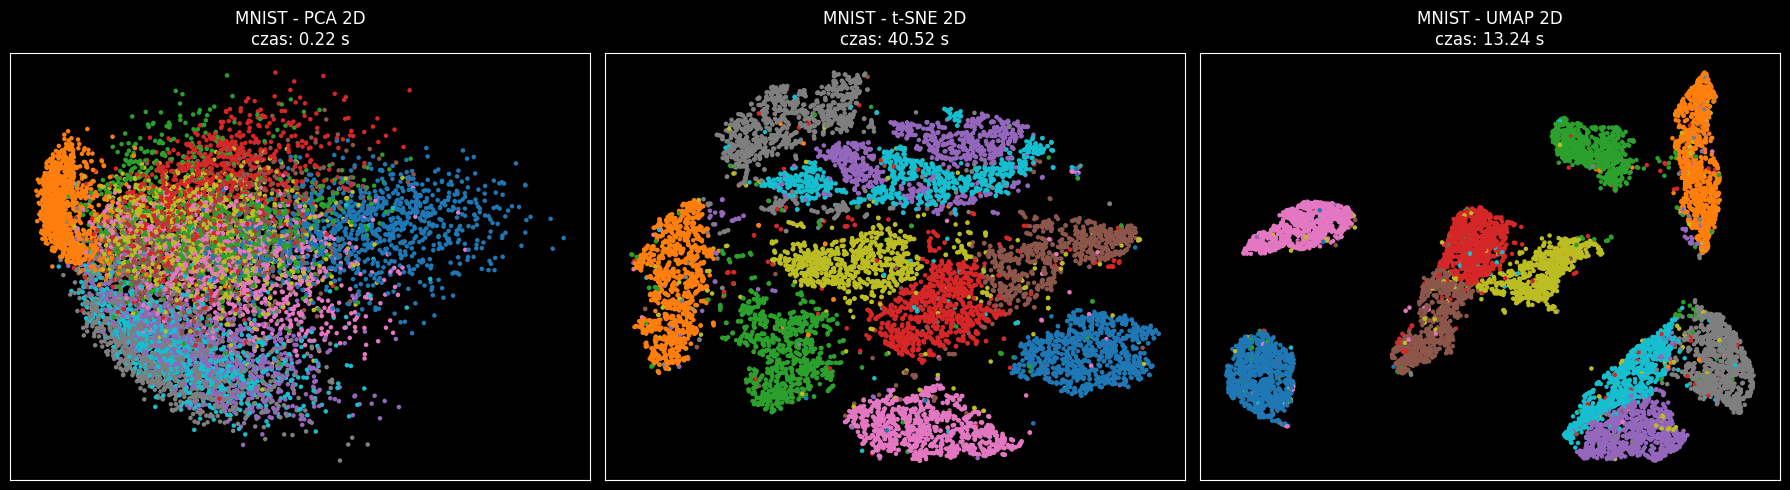

PCA on MNIST computation time: 0.2197
t-SNE on MNIST computation time: 40.5156
UMAP on MNIST computation time: 13.2410


In [60]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist['data'], mnist['target']
y_mnist = y_mnist.astype(int)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]

# PCA
pca_mnist = PCA(n_components=2)
start_pca = time.perf_counter()
X_mnist_pca = pca_mnist.fit_transform(X_mnist)
end_pca = time.perf_counter()

# t-SNE
tsne_mnist = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_tsne = time.perf_counter()
X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)
end_tsne = time.perf_counter()

# UMAP
umap_mnist = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_umap = time.perf_counter()
X_mnist_umap = umap_mnist.fit_transform(X_mnist)
end_umap = time.perf_counter()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[0].set_title(f"MNIST - PCA 2D\nczas: {end_pca - start_pca:.2f} s")

axs[1].scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[1].set_title(f"MNIST - t-SNE 2D\nczas: {end_tsne - start_tsne:.2f} s")

axs[2].scatter(X_mnist_umap[:, 0], X_mnist_umap[:, 1], c=y_mnist, cmap='tab10', s=5)
axs[2].set_title(f"MNIST - UMAP 2D\nczas: {end_umap - start_umap:.2f} s")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

print(f"PCA on MNIST computation time: {end_pca - start_pca:.4f}")
print(f"t-SNE on MNIST computation time: {end_tsne - start_tsne:.4f}")
print(f"UMAP on MNIST computation time: {end_umap - start_umap:.4f}")

- Metoda PCA jako metoda liniowa okazała się nieskuteczna na zbiorze MNIST
- t-SNE oraz UMAP skutecznie rozdzieliły zbiór MNIST, choć UMAP okazał się lepszy
- UMAP działa znacznie szybciej od metody t-SNE

# Klasyfikacja za pomocą klasyfikatora Random Forest

## Klasyfikacja bez redukcji wymiarowości

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
start_clf = time.perf_counter()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
end_clf = time.perf_counter()
print("Accuracy no reduction:", accuracy_score(y_test, y_pred))
print("Precision no reduction:", precision_score(y_test, y_pred, average='macro'))
print("Recall no reduction:", recall_score(y_test, y_pred, average='macro'))
print("F1-score no reduction:", f1_score(y_test, y_pred, average='macro'))
print(f"Time no reduction: {end_clf - start_clf:.4f} seconds")
print("Confusion Matrix no reduction:\n", confusion_matrix(y_test, y_pred))

Accuracy no reduction: 0.95
Precision no reduction: 0.9491907552039738
Recall no reduction: 0.9485936078573112
F1-score no reduction: 0.9487387159529771
Confusion Matrix no reduction:
 [[205   1   0   0   0   0   0   0   1   0]
 [  0 213   3   0   0   0   0   0   0   0]
 [  2   0 192   4   1   0   2   2   1   0]
 [  0   1   3 175   0   4   0   4   4   1]
 [  0   0   2   0 198   0   1   1   2   7]
 [  2   1   1   8   1 160   1   0   1   1]
 [  1   0   0   0   1   2 214   1   1   0]
 [  0   2   2   0   0   0   0 208   1   3]
 [  1   0   1   2   3   0   0   1 158   0]
 [  2   2   0   5   2   0   0   3   1 177]]


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_mnist_pca, y_mnist, test_size=0.2, random_state=42)
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

start_clf_pca = time.perf_counter()
clf.fit(X_train_pca_scaled, y_train_pca)
y_pred_pca = clf.predict(X_test_pca_scaled)
end_clf_pca = time.perf_counter()
print("Accuracy with PCA:", accuracy_score(y_test_pca, y_pred_pca))
print("Precision with PCA:", precision_score(y_test_pca, y_pred_pca, average='macro'))
print("Recall with PCA:", recall_score(y_test_pca, y_pred_pca, average='macro'))
print("F1-score with PCA:", f1_score(y_test_pca, y_pred_pca, average='macro'))
print(f"Time with PCA: {end_clf_pca - start_clf_pca:.4f} seconds")
print("Confusion Matrix with PCA:\n", confusion_matrix(y_test_pca, y_pred_pca))


Accuracy with PCA: 0.434
Precision with PCA: 0.41422462714837127
Recall with PCA: 0.4243352308685486
F1-score with PCA: 0.4180865635332146
Confusion Matrix with PCA:
 [[159   0  15   4   0   5  18   0   6   0]
 [  0 196   4   2   2   0   5   2   5   0]
 [ 21   7  48  38   3  25  30   0  29   3]
 [  4   2  23  95   2  19  17   2  27   1]
 [  0   1   1   1  85   8   9  42   3  61]
 [ 14   4  25  34   8  23  27   3  35   3]
 [ 26   3  33   8   6  31  67   3  35   8]
 [  0   6   3   1  45   7   5  91   1  57]
 [  9   0  33  40   1  19  16   0  45   3]
 [  4   4   2   3  52   3   5  55   5  59]]


In [ ]:
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_mnist_tsne, y_mnist, test_size=0.2, random_state=42)
X_train_tsne_scaled = scaler.fit_transform(X_train_tsne)
X_test_tsne_scaled = scaler.transform(X_test_tsne)

start_clf_tsne = time.perf_counter()
clf.fit(X_train_tsne_scaled, y_train_tsne)
y_pred_tsne = clf.predict(X_test_tsne_scaled)
end_clf_tsne = time.perf_counter()
print("Accuracy with t-SNE:", accuracy_score(y_test_tsne, y_pred_tsne))
print("Precision with t-SNE:", precision_score(y_test_tsne, y_pred_tsne, average='macro'))
print("Recall with t-SNE:", recall_score(y_test_tsne, y_pred_tsne, average='macro'))
print("F1-score with t-SNE:", f1_score(y_test_tsne, y_pred_tsne, average='macro'))
print(f"Time with t-SNE: {end_clf_tsne - start_clf_tsne:.4f} seconds")
print("Confusion Matrix with t-SNE:\n", confusion_matrix(y_test_tsne, y_pred_tsne))


Accuracy with t-SNE: 0.9495
Precision with t-SNE: 0.9489878923764558
Recall with t-SNE: 0.9479301343692222
F1-score with t-SNE: 0.9482565419665618
Confusion Matrix with t-SNE:
 [[206   0   0   1   0   0   0   0   0   0]
 [  0 213   1   0   0   0   0   0   2   0]
 [  3   2 194   1   0   0   0   2   1   1]
 [  1   0   2 179   0   5   0   3   1   1]
 [  0   2   0   0 195   0   2   1   0  11]
 [  0   1   0   6   1 164   1   0   2   1]
 [  4   0   0   0   0   2 214   0   0   0]
 [  0   3   1   0   3   0   0 206   0   3]
 [  1   2   1   5   0   3   0   0 152   2]
 [  2   1   0   4   4   0   0   4   1 176]]


In [66]:
X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X_mnist_umap, y_mnist, test_size=0.2, random_state=42)
X_train_umap_scaled = scaler.fit_transform(X_train_umap)
X_test_umap_scaled = scaler.transform(X_test_umap)

start_clf_umap = time.perf_counter()
clf.fit(X_train_umap_scaled, y_train_umap)
y_pred_umap = clf.predict(X_test_umap_scaled)
end_clf_umap = time.perf_counter()
print("Accuracy with UMAP:", accuracy_score(y_test_umap, y_pred_umap))
print("Precision with UMAP:", precision_score(y_test_umap, y_pred_umap, average='macro'))
print("Recall with UMAP:", recall_score(y_test_umap, y_pred_umap, average='macro'))
print("F1-score with UMAP:", f1_score(y_test_umap, y_pred_umap, average='macro'))
print(f"Time with UMAP: {end_clf_umap - start_clf_umap:.4f} seconds")
print("Confusion Matrix with UMAP:\n", confusion_matrix(y_test_umap, y_pred_umap))

Accuracy with UMAP: 0.945
Precision with UMAP: 0.9442573138331494
Recall with UMAP: 0.9429437021975797
F1-score with UMAP: 0.9433189344515659
Time with UMAP: 1.1148 seconds
Confusion Matrix with UMAP:
 [[205   1   1   0   0   0   0   0   0   0]
 [  0 212   1   0   1   0   0   0   2   0]
 [  1   3 191   1   0   2   0   4   1   1]
 [  1   1   2 176   0   3   0   4   4   1]
 [  0   3   0   0 197   0   2   0   2   7]
 [  1   2   0   4   1 165   1   0   0   2]
 [  4   0   0   0   0   1 215   0   0   0]
 [  0   3   2   0   0   1   0 204   2   4]
 [  1   2   1   4   1   5   0   2 146   4]
 [  2   1   0   5   1   0   0   4   0 179]]
